In this project, you'll be working and analyzing gun deaths data in the US.The dataset came from FiveThirtyEight. I'll be using the techniques and skills learned so far from by following Data analysis track provided by Dataqest.com, by the way its very useful course as you gona to learn by doing and practicing on real data and anwering a real business questions. Just wanted to thank you people.The dataset is stored in the **"guns.csv"** file , which contains information on gun deaths in the US from 2012 to 2014.The columns contain demographic and other information about the victim. Each row in the dataset represents a single fatality.Here are the first few rows of the dataset:

| sn | year | month | intent  | police | sex | age | race                   | Hispanic | place           | education | 
|----|------|-------|---------|--------|-----|-----|:------------------------:|----------|-----------------|-----------| 
| 1  | 2012 | 1     | Suicide | 0      | M   | 34  | Asian/Pacific Islander | 100      | Home            | 4         | 
| 2  | 2012 | 1     | Suicide | 0      | F   | 21  | White                  | 100      | Street          | 3         | 
| 3  | 2012 | 1     | Suicide | 0      | M   | 60  | White                  | 100      | Other specified | 4         | 
| 4  | 2012 | 2     | Suicide | 0      | M   | 64  | White                  | 100      | Home            | 4         | 
| 5  | 2012 | 2     | Suicide | 0      | M   | 31  | White                  | 100      | Other specified | 2         | 


Also, we'll be working on another dataset **"census.csv"**, which containes info on US race census for the same period and Here are the first few rows of the dataset:

| sn | Id       | Year                 | Id.1   | Sex        | Id.2    | Hispanic Origin | Id.3      | Id2 | Geography     | Total     | Race Alone - White | Race Alone - Hispanic | Race Alone - Black or African American | Race Alone - American Indian and Alaska Native | Race Alone - Asian | Race Alone - Native Hawaiian and Other Pacific Islander | Two or More Races | 
|----|----------|----------------------|--------|------------|---------|-----------------|-----------|-----|---------------|-----------|--------------------|-----------------------|----------------------------------------|------------------------------------------------|--------------------|---------------------------------------------------------|-------------------| 
| 0  | cen42010 | April 1, 2010 Census | totsex | Both Sexes | tothisp | Total           | 0100000US | NaN | United States | 308745538 | 197318956          | 44618105              | 40250635                               | 3739506                                        | 15159516           | 674625                                                  | 6984195           | 


As we can see above, the first row of the gun dataset is a header row, 
which tells you what kind of data is in each column of the CSV file. Each row contains information about the fatality, 
and the victim. Here's an explanation of each column:
-- this is an identifier column, which contains the row number. It's common in CSV files to include a unique identifier for each row, but we can ignore it in this analysis.
* **year** -- the year in which the fatality occurred.
* **month** -- the month in which the fatality occurred.
* **intent** -- the intent of the perpetrator of the crime. This can be Suicide, Accidental, NA, Homicide, or Undetermined.
* **police** -- whether a police officer was involved with the shooting. Either 0 (false) or 1 (true).
* **sex** -- the gender of the victim. Either M or F.
* **age** -- the age of the victim.
* **race** -- the race of the victim. Either Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White.
* **hispanic** -- a code indicating the Hispanic origin of the victim.
* **place** -- where the shooting occurred. Has several categories, which you're encouraged to explore on your own.
* **education** -- educational status of the victim. Can be one of the following:
    1. Less than High School
    2. Graduated from High School or equivalent
    3. Some College
    4. At least graduated from College
    5. Not available

In this project, we'll explore the dataset, and try to find patterns in the demographics of the victims.

#### Our first step is to read the data in and take a look at it.

In [ ]:
import sys
import csv
import datetime,time
import types
import pandas as pd

In [91]:
f= open ('guns.csv','r')
guns_data = list(csv.reader(f))
f = open ("census.csv",'r')
usa_2014_census = list(csv.reader(f))
f = open ("modified_guns_data.csv",'r')
mod_guns_data = list(csv.reader(f))

In [92]:
class dataset():
    def __init__(self,guns_csv,census_csv):
        self.guns_csv = guns_csv
        self.guns_rows = self.guns_csv[1:]
        self.guns_header = self.guns_csv[0]
        self.census_csv = census_csv
        self.cen_rows = self.census_csv[1:]
        self.cen_header = self.census_csv[0]
        
    #extracting column index by label from passed obj_header
    def get_col_index(self,header, label):
        idx =0
        for i,v in enumerate(header):
            if v == label:
                idx=i
        return idx
    #----------------------------------
    # method to find a column by passed label from Gun_dataset and retrun dict_count for that column 
    def find_count_item(self,label):
        dict_count = {}
        #extracting label index
        for i,v in enumerate(self.guns_header):
            if v == label:
                idx=i
        #looping through data and extracting column_with idx
        label_lst =[item[idx] for item in self.guns_rows]
        #counting items and add to dict
        for item in label_lst:
            if item in dict_count:
                dict_count[item] += 1
            else:
                dict_count[item]  = 1
        return dict_count 
    #----------------------------------
    # fetch items/columns from dataset using passed list of itme/s, along with the data header and return all the rows of matched items 
    def get_item_lst(self,labels=[]):
        items_lst  = []
        for label in labels:
            if label in self.guns_header:
                idx = self.guns_header.index(label)
                extracted_lst = [item[idx] for item in self.guns_rows]
                items_lst.append(extracted_lst)
        return items_lst
    #----------------------------------
    #count any list and return a dict_of_counts
    def count_item_lst(self,item_lst = []):
        dict_counts = {}
        if any(isinstance(el, list) for el in item_lst) == True:
            for item in item_lst:
                for i in item:
                    if i in dict_counts:
                        dict_counts[i] +=1
                    else:dict_counts[i] = 1        
        else:
             for item in item_lst:
                if item in dict_counts:
                    dict_counts[item] += 1
                else:dict_counts[item] = 1
        return dict_counts
    #----------------------------------
    # class method to do filteration based on some passed paramters
    # (self,f1_lst=[],f2_lst=[],outter_key) throw SyntaxError: non-default argument follows default argument
    def count_innerDict(self,f1_lst,f2_lst,outter_key): 
        nested_dict ={}
        for i,v in enumerate(f2_lst):
            if f1_lst[i] == outter_key:
                if v in nested_dict:nested_dict[v]+= 1
                else: nested_dict[v] = 1
        return nested_dict 
    
    #  method to do column filteration based on a passed Optional_Argument
    def death_filter(self,filter_1,filter_2,filter_1_opt=None): #("intent","place","Homicide") OR #("race","sex")
        outterDict = {}
        idx=idx2=0
        for i,v in enumerate(self.guns_header):
            if v == filter_1:
                idx = i
            if v == filter_2:
                idx2= i
        f1_lst = [item[idx] for item in self.guns_rows] # for_example_race
        f2_lst = [item[idx2] for item in self.guns_rows] # for_example_sex
        if filter_1_opt is None: #check if Optional_Argument passed
            #Create a nested Dict to hold filter_1 as outterDict_Key{"Blak": {"F": 256 , "M":2200}} and innerDict as values
            for i,v in enumerate(f1_lst):  
                if v in outterDict: 
                    pass
                else: outterDict[v] = self.count_innerDict(f1_lst,f2_lst,v) #calling to a nested fun
        else:
            for i,v in enumerate(f2_lst):
                if f1_lst[i] == filter_1_opt:
                    if v in outterDict:
                        outterDict[v] += 1
                    else: outterDict[v] = 1
                else: pass
        return outterDict
    #---------------------------------
    #calcuate rates/100K 
    def death_rate(self,count_dict, total_count_dict, rate=100): #optional argument with default value
        rate_dict ={}
        for i,v in count_dict.items():
            if isinstance(v,dict): #if type(ele) in my_dict.values is dict:
                rate_dict[i]= {j: round((count_dict[i][j]/total_count_dict[i]*rate),2) for j,z in v.items()}
            else:
                for i,v in count_dict.items():
                    rate_dict[i] = round((count_dict[i]/total_count_dict[i])*rate,2)
        return rate_dict
    #---------------------------------
    #search dataset/columns for all blank/empty rows
    def findfill_blank(self):
        dataset_dict ={}
        blank_items_lst=[]
        for i,v in enumerate(self.guns_header):
            #[if_true_statement (if_condition) else/elif_condition (else_statement) for_loop]
            dataset_dict[v] = [item[i] if item[i]!="" else 'Unknown' for item in self.guns_rows]
        for key,value in dataset_dict.items():
            for i,v in enumerate(value):
                if v == 'Unknown':
                    blank_items_lst.append((i,key))
            if len(blank_items_lst) ==0:
                print("no blank")
        return dataset_dict,blank_items_lst

#### Instantiation dataset object

In [93]:
data = dataset(mod_guns_data,usa_2014_census)

###### Task-1: we have to load our dataset first as df in our notebook.
* Read the dataset in as a list using the csv module.
  * Import the csv module.
  * Open the file using the open() function.
  * Use the csv.reader() function to load the opened file.
* Call list() on the result to get a list of all the data in the file.
  * Assign the result to the variable data.
* Display the first 5 rows of data to verify everything.
* Extract the first row of data, and assign it to the variable headers.
* Remove the first row from data.
* Display headers.
* Display the first 5 rows of data to verify that you removed the header row properly.

In [94]:
print(data.guns_header)

['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


In [95]:
data.guns_rows[:1]

[['1',
  '2012',
  '1',
  'Suicide',
  '0',
  'M',
  '34.0',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4.0']]

#### Task-2:
* Use a list comprehension to extract the year column from data.
    * Because the year column is the second column in the data, you'll need to get the element at index 1 in each row.
    * Assign the result to the variable years.
* Create an empty dictionary called year_counts.
* Loop through each element in years.
    * If the element isn't a key in year_counts, create it, and set the value to 1.
    * If the element is a key in year_counts, increment the value by one.
* Display year_counts to see how many gun deaths occur in each year.

In [12]:
year_counts = data.count_item_lst(data.get_item_lst(['year']))

In [13]:
month_counts = data.find_count_item('month')

###### It looks like gun deaths didn't change much by year from 2012 to 2014. 
Let's see if gun deaths in the US change by month and year. In order to do this, 
we'll have to create a **datetime.datetime object**  using the year and month columns. 
We'll then be able to count up gun deaths by date, like we did by year in the last screen.

You can create a datetime object by specifying the year, month, and day keyword arguments:
    **date = datetime(year=2016, month=12, day=1)**

We can use the month and year column of data to create a datetime.We'll specify a fixed *day* because we're missing that column in our data.
If we create a **datetime.datetime** object for each row, we can then count up how many gun deaths occurred in each month and year.

#### Task-3:
* Use a list comprehension to create a datetime.datetime object for each row. Assign the result to dates.
    * The year column is in the second element in each row.
    * The month column is the third element in each row.
    * Make sure to convert year and month to integers using int().
    * Pass year, month, and day=1 into the datetime.datetime() function.
* Display the first 5 rows in dates to verify everything worked.
* Count up how many times each unique date occurs in dates. Assign the result to date_counts.
    * This follows a similar procedure to what we did in the last screen with year_counts.
* Display date_counts.

In [97]:
death_dates = [datetime.datetime(year=int(item[data.get_col_index(data.guns_header,'year')]), month=int(item[data.get_col_index(data.guns_header,'month')]), day =1 ) for item in data.guns_rows ]

In [98]:
y_m =[]
for item in death_dates:
    y_m.append((item.year,item.month))
date_counts = data.count_item_lst(y_m)

#### Task-4:
The sex and race columns contain potentially interesting information on how gun deaths in the US vary by gender and race. Exploring both of these columns can be done with a similar dictionary counting technique to what we did earlier.
* Count up how many times each item in the sex column occurs.
    * Assign the result to sex_counts.
* Count up how many times each item in the race column occurs.
    * Assign the result to race_counts.
* Display race_counts and sex_counts to verify your work, and see if you can spot any patterns.
* Write a markdown cell detailing what you've learned so far, and what you think might need further examination.

In [99]:
sex_counts = data.find_count_item('sex') # total death count per sex

In [100]:
race_counts = data.find_count_item('race') # total death count per race

In [101]:
age_counts = data.find_count_item('age') # total death count per age

In [102]:
intent_counts= data.count_item_lst(data.get_item_lst(['intent']))

#### Task-5:
* Read in census.csv, and convert to a list of lists. Assign the result to the census variable.
* Display census to verify your work.

| sn | Id       | Year                 | Id.1   | Sex        | Id.2    | Hispanic Origin | Id.3      | Id2 | Geography     | Total     | Race Alone - White | Race Alone - Hispanic | Race Alone - Black or African American | Race Alone - American Indian and Alaska Native | Race Alone - Asian | Race Alone - Native Hawaiian and Other Pacific Islander | Two or More Races | 
|----|----------|----------------------|--------|------------|---------|-----------------|-----------|-----|---------------|-----------|--------------------|-----------------------|----------------------------------------|------------------------------------------------|--------------------|---------------------------------------------------------|-------------------| 
| 0  | cen42010 | April 1, 2010 Census | totsex | Both Sexes | tothisp | Total           | 0100000US | NaN | United States | 308745538 | 197318956          | 44618105              | 40250635                               | 3739506                                        | 15159516           | 674625                                                  | 6984195           | 


Earlier, we computed the number of gun deaths per race, and created a dictionary, race_counts, that looked like this:

**{
     'Asian/Pacific Islander': 1326,
     'Black': 23296,
     'Hispanic': 9022,
     'Native American/Native Alaskan': 917,
     'White': 66237
}**

In order to get from the raw counts of gun deaths by race to a rate of gun deaths per 100000 people in each race, we'll need to divide the total number of gun deaths by the population of each race. From the census dataset, we know that the number of people in the White racial category is 197318956. We'd divide 66237 by 197318956:


**white_gun_death_rate = 66237 / 197318956**
This gives us the percentage chance that a given person in the White census race category would have been killed by a gun in the US from 2012 to 2014. If you do this computation, you'll see that the rate is a very small number, 0.0003356849303419181. It's for this reason that it's typical to express crime statistics as the "rate per 100000". This tells you the number of people in a given group out of every 100000 that were killed by guns in the US. To get this, we just multiply by 100000:


**rate_per_hundredk = 0.0003356849303419181 * 100000**
This gives us 33.56, which we can interpret as "33.56 out of every 100000 people in the White census race category in the US were killed by guns between 2012 and 2014".

We'll need to calculate these same rates for each racial category. The only stumbling block is that the racial categories are named slightly differently in census and in data. We'll need to manually construct a dictionary that allows us to map between them, and perform the division.

Here's a list of the race name in data, and the corresponding race name in census:

* **Asian/Pacific Islander -- Race Alone - Asian **plus** Race Alone - Native Hawaiian and Other Pacific Islander.**
* **Black -- Race Alone - Black or African American.**
* **Hispanic -- Race Alone - Hispanic**
* **Native American/Native Alaskan -- Race Alone - American Indian and Alaska Native**
* **White -- Race Alone - White**

We'll need to create a dictionary that has each race name from data as a key, and has the population count for the races from census as the values.

#### Creating dict of Headers/values from census dataset

In [103]:
race_population = {}
race_rows = [v for i,v in enumerate(data.cen_rows[0])]
for i,v in enumerate(data.cen_header):
    race_population[v] = race_rows[i]

In [104]:
race_population

{'Geography': 'United States',
 'Hispanic Origin': 'Total',
 'Id': 'cen42010',
 'Id.1': 'totsex',
 'Id.2': 'tothisp',
 'Id.3': '0100000US',
 'Id2': '',
 'Race Alone - American Indian and Alaska Native': '3739506',
 'Race Alone - Asian': '15159516',
 'Race Alone - Black or African American': '40250635',
 'Race Alone - Hispanic': '44618105',
 'Race Alone - Native Hawaiian and Other Pacific Islander': '674625',
 'Race Alone - White': '197318956',
 'Sex': 'Both Sexes',
 'Total': '308745538',
 'Two or More Races': '6984195',
 'Year': 'April 1, 2010 Census'}

### Mapping Dicts race_counts with race_population in new dict race_map
Manually create a dictionary, mapping that maps each key from race_counts to the population count of the race from census.
The keys in the dictionary should be:
* **Asian/Pacific Islander**
* **Black**
* **Native American/Native Alaskan**
* **Hispanic**
* **White**

In the case of Asian/Pacific Islander, you'll need to add the counts from census for **Race Alone - Asian, and Race Alone - Native Hawaiian and Other Pacific Islander**.

In [105]:
race_map ={}
race_map['Asian/Pacific Islander']=int(race_population['Race Alone - Asian']) + int(race_population['Race Alone - Native Hawaiian and Other Pacific Islander'])
race_map['White']=int(race_population['Race Alone - White'])
race_map['Native American/Native Alaskan']=int(race_population['Race Alone - American Indian and Alaska Native'])
race_map['Black']=int(race_population['Race Alone - Black or African American'])
race_map['Hispanic']=int(race_population['Race Alone - Hispanic'])

#### Display race_map:

In [106]:
race_map

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

#### Function to Match race_counts[key] with race_population value

In [107]:
import re
def find_key(race,header):
    string = set(re.split('-|/',race)) # split each race on '-' | '/' and create a unique set
    #print(string)
    indices = [] #list of header's indexs where splited key matched 
    for idx,v in enumerate(header): #loop thorugh passed list of header to match with splitted key
        for s in string:
            if s == 'Native American' or s=='Native Alaskan':
                s = 'American Indian'
            if s in v :
                if idx in indices:
                    pass
                else:
                    indices.append(idx)
            else:
                pass
    return indices # returned indexs

In [108]:
race_header = data.cen_header[10:17] #extracting only race_header columns from census dataset
race_value  = data.cen_rows[0][10:17] #extract race_value columns from census dataset

In [109]:
map_race = {}
for race,count in race_counts.items():
    total = 0
    idx=find_key(race,race_header)
    if (len(idx)>1):
        for i,v  in enumerate(idx):
            total = total + int(race_value[v])
        map_race[race] = total
    else:
        for i,v  in enumerate(idx):
            map_race[race] = int(race_value[v])

In [110]:
map_race

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

##### Task-6
* Create an empty dictionary, race_per_hundredk.
* Loop through each key in race_counts .
* Divide the value associated with the key in race_counts by the value associated with the key in mapping **[races_mapping]**.
Multiply by 100000.
* Assign the result to the same key in race_per_hundredk.
* When you're done, race_per_hundredk should contain the rate of gun deaths per 100000 people for each racial category.
* Print race_per_hundredk to verify your work.

In [111]:
race_per_hundredk = {}
for i,v in race_counts.items():
    race_per_hundredk[i] = round((race_counts[i]/map_race[i])*100000, 2)

In [112]:
race_per_hundredk

{'Asian/Pacific Islander': 8.37,
 'Black': 57.88,
 'Hispanic': 20.22,
 'Native American/Native Alaskan': 24.52,
 'White': 33.57}

#### More Filteration:
We can filter our results, and restrict them to the Homicide intent. This will tell us what the gun-related murder rate per 100000 people in each racial category is. In order to do this, we'll need to redo our work in generating race_counts, but only count rows where the intent was Homicide.

We can do this by first extracting the intent column, then using the enumerate() function to loop through each index and value in the race column. If the value in the same position in intents is Homicide, we'll count the value in the race column.

Finally, we'll use the mapping dictionary to convert from raw counts to rates.

#### Task-7:

* Extract the intent column using a list comprehension. The intent column is the fourth column in data.
    * Assign the result to intents.
* Extract the race column using a list comprehension. The race column is the eighth column in data.
    * Assign the result to races.
* Create an empty dictionary called homicide_race_counts
* Use the enumerate() function to loop through each item in races. The position should be assigned to the loop variable i, and the value to the loop variable race.
    * Check the value at position i in intents.
    * If the value at position i in intents is Homicide:
        * If the key race doesn't exist in homicide_race_counts, create it.
        * Add 1 to the value associated with race in homicide_race_counts.
* When you're done, homicide_race_counts should have one key for each of the racial categories in data. The associated value should be the number of gun deaths by homicide for that race.
* Perform the same procedure we did in the last screen using mapping on homicide_race_counts to get from raw numbers to rates per 100000.
* Display homicide_race_counts to verify your work.
* Write up your findings in a markdown cell.
* Write up any next steps you want to pursue with the data in a markdown cell.

In [113]:
homicide_race_counts=data.death_filter('intent','race','Homicide') #please pass argumnets as following >> filter_1 /group_by_filtter/filter_1_opt

In [114]:
homicide_race_counts

{'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Hispanic': 5634,
 'Native American/Native Alaskan': 326,
 'White': 9147}

In [115]:
data.death_rate(homicide_race_counts,race_map,rate=100000) #overide method default argument rate=100 - We have Race populations in race_map

{'Asian/Pacific Islander': 3.53,
 'Black': 48.47,
 'Hispanic': 12.63,
 'Native American/Native Alaskan': 8.72,
 'White': 4.64}

#### That's it for the guided steps! We recommend exploring the data more on your own.

Here are some potential next steps:

* Figure out the link, if any, between month and homicide rate.
* Explore the homicide rate by gender.
* Explore the rates of other intents, like Accidental, by gender and race.
* Find out if gun death rates correlate to location and education.

We recommend creating a Github repository and placing this project there. It will help other people, including employers, see your work. As you start to put multiple projects on Github, you'll have the beginnings of a strong portfolio. You're welcome to keep working on the project here, but we recommend downloading it to your computer using the download icon above and working on it there.

In [116]:
homicide_month_counts=data.death_filter('intent','month','Homicide')

In [117]:
homicide_month_rate = data.death_rate(homicide_month_counts,month_counts,rate=100) 

In [118]:
import calendar
#{key: value for key, value in d.items()}
mo_dict = {calendar.month_name[int(i)]: v for i,v in homicide_month_counts.items()}

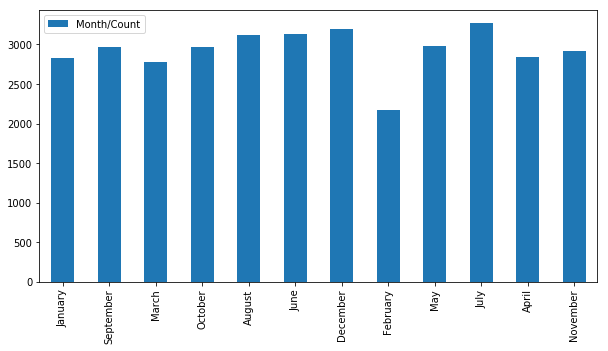

In [119]:
homicide_per_month= pd.DataFrame.from_dict(mo_dict, orient ="index") #dataframe from dict
homicide_per_month.columns = ['Month/Count'] #Count as column lable
#df.head(10).plot.bar()
homicide_per_month.plot.bar(figsize=[10,5])

* By looking into the above bar_graph:we noticed that there is no big variations in guns murders in months however, we can see the number of murders is less in Febraury.
And if we compare the number of murders date wise (year_month) , its showing that the month of Febraury has the less number of murders in 2012/2013/2014 
###### as showing below:

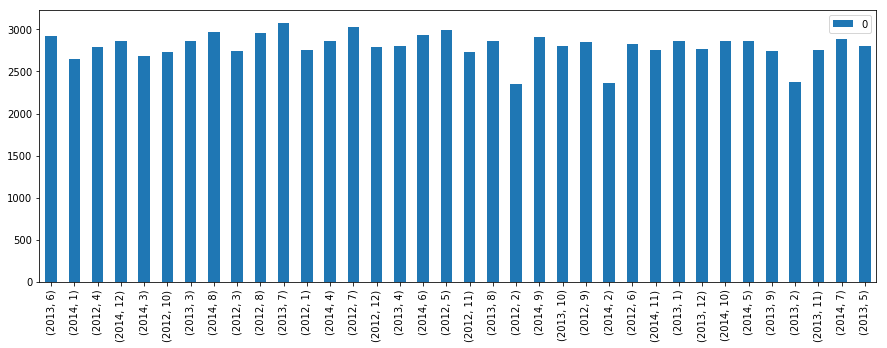

In [84]:
homicide_per_dates = pd.DataFrame.from_dict(date_counts, orient ="index").plot.bar(figsize=[15,5])

In [40]:
Homicide_sex_count= data.death_filter('intent','sex','Homicide')

* **Female Homicides is higher than male**

In [41]:
data.death_rate(Homicide_sex_count,sex_counts)

{'F': 37.19, 'M': 34.51}

In [42]:
Accidental_sex= data.death_filter('intent','sex','Accidental')

In [43]:
data.death_rate(Accidental_sex,sex_counts) #we did not passed 'rate' argument as we need to calculate with default value: rate=100

{'F': 1.51, 'M': 1.65}

In [44]:
Accidental_race= data.death_filter('intent','race','Accidental')

* **Accidental guns murder hits high in black races than other races**

In [45]:
data.death_rate(Accidental_race,race_map,rate=100000)#overide method default argument rate=100000

{'Asian/Pacific Islander': 0.08,
 'Black': 0.81,
 'Hispanic': 0.32,
 'Native American/Native Alaskan': 0.59,
 'White': 0.57}

In [46]:
murder_location =data.death_filter('intent','place')

* **Suicide** and **Homicide** in **Home** showing spike in our data

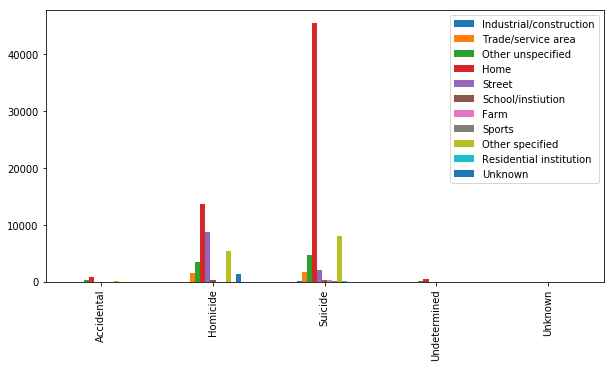

In [47]:
murder_per_location = pd.DataFrame.from_dict(murder_location, orient ="index")
murder_per_location.plot.bar(figsize=[10,5])

In [48]:
death_educate =data.death_filter('intent','education')

In [49]:
death_educateRate = data.death_rate(death_educate,intent_counts,rate=100)#overide method default argument rate=100000

* **People with education 2.0 are more likely to Suicide as showing below. Also, they are more likely to be murdered "Homicide"**

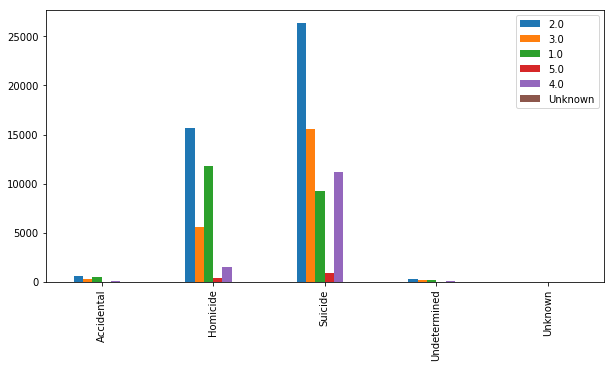

In [50]:
pd.DataFrame.from_dict(death_educate, orient ="index").plot.bar(figsize=[10,5])

* **Unkown data caused spike when we calculate the rate of deaths per education level**

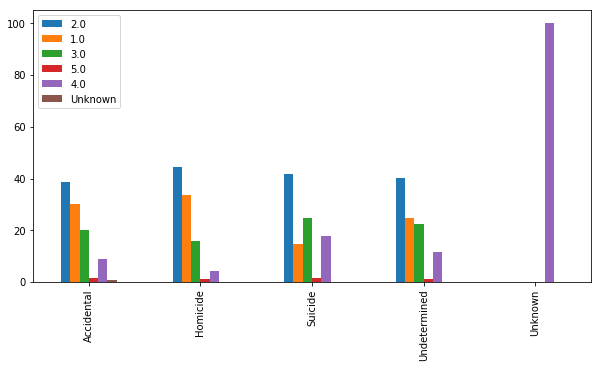

In [66]:
pd.DataFrame.from_dict(death_educateRate, orient ="index").plot.bar(figsize=[10,5])